# This is just a very simply script to reformat a CMFGen continuum, file into something readable by Python for a test



In [11]:
import os

import numpy as np

os.getcwd()

'/Users/long/Projects/Python/star_cmfgen_a3'

In [12]:
from astropy.io import ascii
import matplotlib.pyplot as plt

In [13]:
x=ascii.read('../../CMFGEN/models/ostar/a3.cont_spec')
x.info()

<Table length=5826>
 name  dtype 
----- -------
 Freq float64
 Wave float64
nuFnu float64


For the input spectra, Python explcitly requries that the spectra are in the form of the Eddington flux, and that this be given in $ergs cm^{-2} s^{-1} $

CMFGen gives spectra in units of Jy at 1 kpc, or $10^{-23} ergs cm^2 Hz^1}

but we have already converted this in creating the tables above to cgs units nuFnu is for the observed flux at 100 pc in $ergs cm^[-2} s^{-1}$.  

So the relationship we want here is based ont the equation

$$
H = \frac{1}{4\pi}\left ( \frac{D}{R} \right )^2 F
$$

For the a3 model, R = 136.416 R_sun, for the A1 model it was the same. 

In [14]:
ratio=1/(4*np.pi)*(100*3.08e18)**2/(136.416*6.96e10)**2
print('%.3e' % ratio)

8.374e+13


In [15]:
old_ratio=(1e39/2.54e23)*(1.87/2.13)
print('%.3e' % old_ratio)
print(old_ratio/ratio)

3.456e+15
41.2748799389974


In [6]:
x['Flambda']=x['nuFnu']/x['Wave']

In [7]:
x['Flambda']=x['nuFnu']/x['Wave']

x['Flambda']*=(1e39/2.54e23)*(1.87/2.13)

x['Wave'].format='.3f'
x['Flambda'].format='8.3e'

In [8]:
x['Wave','Flambda'].write('cont.txt',format='ascii.commented_header',overwrite=True)

(850, 1850)

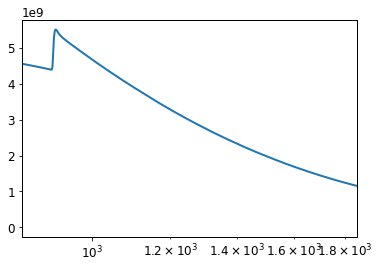

In [9]:
plt.semilogx(x['Wave'],x['Flambda'])
plt.xlim(850,1850)

## What is the predicted luminosity if this really is the Eddington flux

In [10]:
r=136.416*6.96e10
